<a href="https://colab.research.google.com/github/Diya1s/Diya1s/blob/main/bonus3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RandomForest Accuracy: 0.8675
GradientBoosting Accuracy: 0.8665


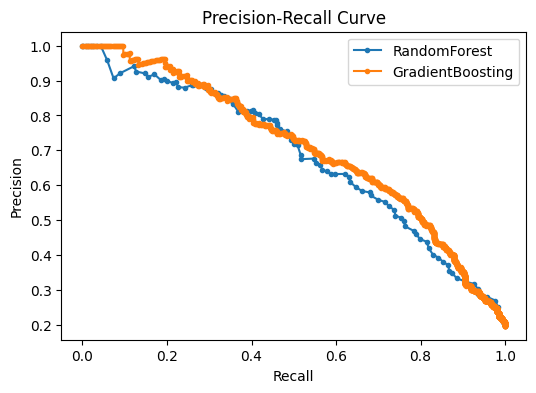

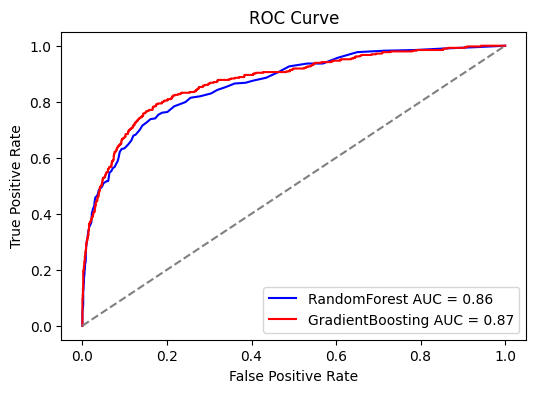

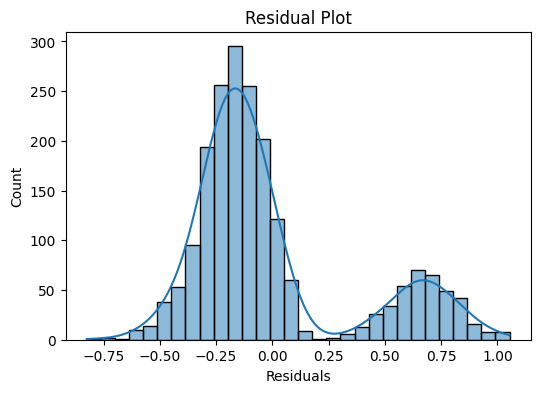

Mean Squared Error: 0.1331


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc, mean_squared_error, accuracy_score

# Load dataset
df = pd.read_csv("Bank_Churn.csv")

# Preprocessing
df.dropna(inplace=True)
X = df.drop(columns=['churn'])  # Features
y = df['churn']  # Target

# Convert categorical features to numerical using one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Classification Model 1 - RandomForest
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)
y_pred_prob1 = clf1.predict_proba(X_test)[:, 1]
y_pred1 = clf1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)

# Classification Model 2 - GradientBoosting
clf2 = GradientBoostingClassifier()
clf2.fit(X_train, y_train)
y_pred_prob2 = clf2.predict_proba(X_test)[:, 1]
y_pred2 = clf2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)

# Compare Accuracy
print(f'RandomForest Accuracy: {acc1:.4f}')
print(f'GradientBoosting Accuracy: {acc2:.4f}')

# Precision-Recall Curve
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_prob1)
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_prob2)
plt.figure(figsize=(6, 4))
plt.plot(recall1, precision1, marker='.', label='RandomForest')
plt.plot(recall2, precision2, marker='.', label='GradientBoosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ROC Curve
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(6, 4))
plt.plot(fpr1, tpr1, color='blue', label=f'RandomForest AUC = {roc_auc1:.2f}')
plt.plot(fpr2, tpr2, color='red', label=f'GradientBoosting AUC = {roc_auc2:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Regression Model - Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Model Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset (replace 'house_prices.csv' with actual file path)
df = pd.read_csv("House_data.csv")

# Display first few rows of dataset
print(df.head())

# Define features and target variable
X = df[['bathrooms', 'bedrooms', 'sqft_living','city']]
y = df['price']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (optional, improves performance for some datasets)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualization: Actual vs. Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

ValueError: could not convert string to float: 'Woodinville'